In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("azd.csv")
num_rows = data.shape[0]
data.head()

,priceDate,itemName,state,mandiName,arrivals,unitArrivals,variety,minPrice,maxPrice,modalPrice,priceUnit
0,2005-04-11,Potato,NCT of Delhi,Azadpur,106.0,Tonnes,F.A.Q.,300.0,663.0,475.0,Rs/Quintal
1,2005-04-12,Potato,NCT of Delhi,Azadpur,1745.0,Tonnes,F.A.Q.,325.0,688.0,500.0,Rs/Quintal
2,2005-04-13,Potato,NCT of Delhi,Azadpur,1233.0,Tonnes,F.A.Q.,300.0,688.0,488.0,Rs/Quintal
3,2005-04-16,Potato,NCT of Delhi,Azadpur,1654.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
4,2005-04-18,Potato,NCT of Delhi,Azadpur,26.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal


In [4]:
data.describe()

,arrivals,minPrice,maxPrice,modalPrice
count,3778.000000,3804.000000,3804.000000,3795.000000
mean,1169.233086,511.487382,1185.697687,812.674572
std,681.258005,288.991695,706.298731,417.013277
min,0.100000,60.000000,275.000000,198.000000
25%,883.700000,300.000000,700.000000,500.000000
50%,1277.750000,438.000000,1031.000000,700.000000
75%,1569.700000,625.000000,1500.000000,991.000000
max,11984.200000,2100.000000,20580.000000,4060.000000


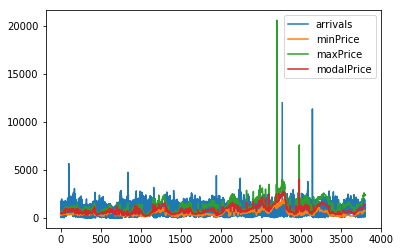

In [14]:
data.plot()
plt.show()

In [62]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

X = pd.read_csv('azd.csv')
X = X.iloc[:, 7]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [31]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [83]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 365
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

   

0: Predicted=318.697, Expected=375
1: Predicted=215.812, Expected=320
2: Predicted=371.369, Expected=320
3: Predicted=236.976, Expected=320
4: Predicted=268.799, Expected=300
5: Predicted=281.311, Expected=280
6: Predicted=280.973, Expected=320
7: Predicted=296.036, Expected=300
8: Predicted=297.790, Expected=300
9: Predicted=298.664, Expected=300
10: Predicted=299.192, Expected=360
11: Predicted=322.667, Expected=340
12: Predicted=354.714, Expected=340
13: Predicted=512.129, Expected=320
14: Predicted=437.845, Expected=320
15: Predicted=453.229, Expected=360
16: Predicted=341.363, Expected=280
17: Predicted=296.932, Expected=260
18: Predicted=282.182, Expected=260
19: Predicted=273.325, Expected=260
20: Predicted=288.009, Expected=200
21: Predicted=253.661, Expected=200
22: Predicted=232.200, Expected=200
23: Predicted=294.303, Expected=200
24: Predicted=182.289, Expected=200
25: Predicted=201.551, Expected=200
26: Predicted=201.076, Expected=250
27: Predicted=220.126, Expected=200
28

226: Predicted=1025.931, Expected=1000
227: Predicted=1015.385, Expected=1050
228: Predicted=1028.383, Expected=1000
229: Predicted=1017.920, Expected=1000
230: Predicted=1010.655, Expected=1000
231: Predicted=966.336, Expected=1050
232: Predicted=998.371, Expected=1000
233: Predicted=880.068, Expected=1000
234: Predicted=1046.195, Expected=1000
235: Predicted=1030.013, Expected=1000
236: Predicted=1017.827, Expected=975
237: Predicted=1040.992, Expected=975
238: Predicted=1015.075, Expected=1040
239: Predicted=1023.826, Expected=813
240: Predicted=903.164, Expected=1040
241: Predicted=932.595, Expected=1040
242: Predicted=975.838, Expected=1000
243: Predicted=1026.466, Expected=1040
244: Predicted=991.946, Expected=1040
245: Predicted=1010.556, Expected=875
246: Predicted=1019.224, Expected=813
247: Predicted=878.183, Expected=875
248: Predicted=934.660, Expected=813
249: Predicted=887.647, Expected=813
250: Predicted=857.242, Expected=750
251: Predicted=794.747, Expected=750
252: Pre

447: Predicted=655.661, Expected=640
448: Predicted=649.652, Expected=660
449: Predicted=653.736, Expected=700
450: Predicted=672.273, Expected=700
451: Predicted=683.531, Expected=700
452: Predicted=690.219, Expected=700
453: Predicted=694.192, Expected=700
454: Predicted=696.551, Expected=700
455: Predicted=697.952, Expected=700
456: Predicted=698.783, Expected=600
457: Predicted=679.288, Expected=600
458: Predicted=647.196, Expected=600
459: Predicted=648.010, Expected=600
460: Predicted=608.586, Expected=700
461: Predicted=645.073, Expected=600
462: Predicted=607.338, Expected=600
463: Predicted=624.238, Expected=700
464: Predicted=654.532, Expected=700
465: Predicted=672.995, Expected=700
466: Predicted=743.963, Expected=680
467: Predicted=758.432, Expected=680
468: Predicted=726.815, Expected=700
469: Predicted=655.850, Expected=700
470: Predicted=673.477, Expected=700
471: Predicted=704.221, Expected=700
472: Predicted=662.596, Expected=700
473: Predicted=657.572, Expected=700
4

668: Predicted=646.052, Expected=640
669: Predicted=643.563, Expected=640
670: Predicted=642.098, Expected=600
671: Predicted=687.334, Expected=600
672: Predicted=683.256, Expected=600
673: Predicted=649.400, Expected=600
674: Predicted=773.040, Expected=600
675: Predicted=703.554, Expected=600
676: Predicted=485.559, Expected=840
677: Predicted=281.429, Expected=840
678: Predicted=854.906, Expected=700
679: Predicted=864.911, Expected=640
680: Predicted=773.060, Expected=540
681: Predicted=680.171, Expected=560
682: Predicted=633.740, Expected=600
683: Predicted=671.347, Expected=600
684: Predicted=592.505, Expected=600
685: Predicted=596.359, Expected=560
686: Predicted=631.427, Expected=540
687: Predicted=594.456, Expected=520
688: Predicted=564.963, Expected=520
689: Predicted=547.341, Expected=560
690: Predicted=552.999, Expected=500
691: Predicted=481.201, Expected=480
692: Predicted=481.240, Expected=460
693: Predicted=472.578, Expected=480
694: Predicted=475.824, Expected=490
6

882: Predicted=1787.194, Expected=1800
883: Predicted=1653.200, Expected=1800
884: Predicted=1712.538, Expected=1900
885: Predicted=1785.494, Expected=1900
886: Predicted=1827.784, Expected=1625
887: Predicted=1742.119, Expected=1875
888: Predicted=1900.758, Expected=2000
889: Predicted=1938.246, Expected=2000
890: Predicted=1960.997, Expected=1900
891: Predicted=1934.676, Expected=1900
892: Predicted=1821.920, Expected=1900
893: Predicted=1779.490, Expected=1800
894: Predicted=1786.059, Expected=1500
895: Predicted=1669.339, Expected=1800
896: Predicted=1728.837, Expected=1800
897: Predicted=1754.994, Expected=1800
898: Predicted=1771.484, Expected=2100
899: Predicted=1928.673, Expected=2000
900: Predicted=1900.131, Expected=1700
901: Predicted=1841.323, Expected=1650
902: Predicted=1703.214, Expected=1650
903: Predicted=1686.942, Expected=1500
904: Predicted=1572.195, Expected=1500
905: Predicted=1587.681, Expected=1500
906: Predicted=1553.813, Expected=1500
907: Predicted=1254.099, 

/home/vishal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1079: Predicted=708.938, Expected=438
1080: Predicted=600.645, Expected=400
1081: Predicted=582.770, Expected=400
1082: Predicted=510.640, Expected=360
1083: Predicted=451.367, Expected=400
1084: Predicted=433.756, Expected=400
1085: Predicted=420.875, Expected=400
1086: Predicted=372.921, Expected=400
1087: Predicted=385.180, Expected=400
1088: Predicted=390.810, Expected=400
1089: Predicted=454.299, Expected=400
1090: Predicted=430.742, Expected=350
1091: Predicted=397.627, Expected=350
1092: Predicted=419.534, Expected=400
1093: Predicted=412.603, Expected=300
1094: Predicted=364.886, Expected=300
1095: Predicted=340.174, Expected=300
1096: Predicted=324.860, Expected=300
1097: Predicted=475.381, Expected=300
1098: Predicted=400.741, Expected=280
1099: Predicted=353.534, Expected=300
1100: Predicted=293.937, Expected=300
1101: Predicted=338.167, Expected=400
1102: Predicted=364.729, Expected=350
1103: Predicted=396.693, Expected=350
1104: Predicted=376.922, Expected=600
1105: Predic

1295: Predicted=693.864, Expected=700
1296: Predicted=696.328, Expected=900
1297: Predicted=786.077, Expected=700
1298: Predicted=643.649, Expected=960
1299: Predicted=784.634, Expected=960
1300: Predicted=855.886, Expected=960
1301: Predicted=898.328, Expected=960
1302: Predicted=923.514, Expected=1000
1303: Predicted=956.164, Expected=1000
1304: Predicted=974.076, Expected=960
1305: Predicted=1116.945, Expected=960
1306: Predicted=897.713, Expected=960
1307: Predicted=928.360, Expected=920
1308: Predicted=923.553, Expected=960
1309: Predicted=939.789, Expected=960
1310: Predicted=968.014, Expected=960
1311: Predicted=944.051, Expected=960
1312: Predicted=731.244, Expected=900
1313: Predicted=1025.549, Expected=900
1314: Predicted=1016.789, Expected=1000
1315: Predicted=1011.684, Expected=1000
1316: Predicted=1006.930, Expected=1000
1317: Predicted=954.110, Expected=1000
1318: Predicted=974.519, Expected=1000
1319: Predicted=984.886, Expected=1000
1320: Predicted=991.036, Expected=100

1510: Predicted=416.440, Expected=300
1511: Predicted=365.940, Expected=300
1512: Predicted=289.402, Expected=300
1513: Predicted=345.139, Expected=300
1514: Predicted=175.504, Expected=300
1515: Predicted=129.981, Expected=300
1516: Predicted=201.358, Expected=300
1517: Predicted=291.040, Expected=300
1518: Predicted=293.116, Expected=300
1519: Predicted=345.886, Expected=300
1520: Predicted=325.906, Expected=300
1521: Predicted=315.498, Expected=240
1522: Predicted=283.321, Expected=240
1523: Predicted=353.919, Expected=240
1524: Predicted=305.409, Expected=280
1525: Predicted=208.422, Expected=220
1526: Predicted=213.944, Expected=220
1527: Predicted=176.379, Expected=200
1528: Predicted=186.491, Expected=200
1529: Predicted=191.920, Expected=240
1530: Predicted=212.480, Expected=200
1531: Predicted=206.225, Expected=200
1532: Predicted=203.724, Expected=200
1533: Predicted=202.227, Expected=200
1534: Predicted=201.332, Expected=200
1535: Predicted=200.797, Expected=200
1536: Predic

1726: Predicted=196.639, Expected=200
1727: Predicted=197.997, Expected=200
1728: Predicted=198.806, Expected=200
1729: Predicted=199.288, Expected=200
1730: Predicted=199.576, Expected=200
1731: Predicted=199.747, Expected=200
1732: Predicted=199.849, Expected=200
1733: Predicted=199.910, Expected=200
1734: Predicted=74.947, Expected=200
1735: Predicted=130.188, Expected=200
1736: Predicted=158.409, Expected=200
1737: Predicted=175.229, Expected=200
1738: Predicted=185.249, Expected=200
1739: Predicted=191.216, Expected=200
1740: Predicted=194.769, Expected=200
1741: Predicted=196.885, Expected=200
1742: Predicted=198.144, Expected=200
1743: Predicted=198.895, Expected=200
1744: Predicted=199.342, Expected=200
1745: Predicted=199.608, Expected=200
1746: Predicted=199.766, Expected=200
1747: Predicted=199.861, Expected=200
1748: Predicted=199.917, Expected=200
1749: Predicted=199.951, Expected=200
1750: Predicted=199.971, Expected=200
1751: Predicted=199.982, Expected=200
1752: Predict

In [84]:
residuals = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

,0
count,1903.000000
mean,0.515203
std,118.138674
min,-1064.574396
25%,-43.440850
50%,-0.762725
75%,41.360134
max,1104.150521


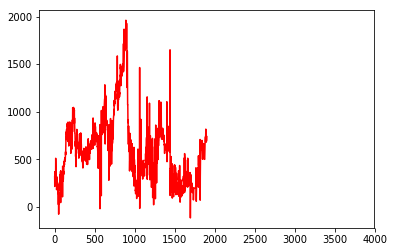

In [86]:
bias_error = 0.515203
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
X = pd.read_csv('azd.csv')
X = X.iloc[:, 7]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Corrected predictions for minPrice

history = [x for x in train]
predictions = list()
for i in range(10):
    # The dataset has values for approx 292 days a year
    days = 292
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias_error + inverse_difference(history, yhat, days)
    predictions.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

   